# Choose a Data Set

You can choose to analyze any data that you would like! Remember, you need 1000 rows of non-null data in order to get 5 points for the "Data" criteria of my [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing). Consider looking at [Kaggle](https://www.kaggle.com/datasets) or [free APIs](https://free-apis.github.io/#/browse) for datasets of this size. Alternatively, you can scrape the web to make your own dataset! :D

Once you have chosen your dataset, please read your data into a dataframe and call `.info()` below. If you don't call `info` I will give you 0 points for the first criteria described on the [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing).

In [12]:
# Read data into a dataframe and call info()
    # Example call:
    # df = pd.DataFrame({"A":[1, 2, 3], "B":[4, 5, 6]})
    # df.info()
import pandas as pd
df = pd.read_csv("Netflix_Movies_and_TV_Shows.csv")
df.head()


,Title,Type,Genre,Release Year,Rating,Duration,Country
0,Title 1,TV Show,Comedy,1955,PG,3 Seasons,Japan
1,Title 2,TV Show,Horror,2020,G,3 Seasons,India
2,Title 3,TV Show,Action,1966,TV-PG,140 min,United States
3,Title 4,Movie,Thriller,2011,PG-13,3 Seasons,Canada
4,Title 5,TV Show,Romance,1959,TV-14,172 min,India


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         3000 non-null   object
 1   Type          3000 non-null   object
 2   Genre         3000 non-null   object
 3   Release Year  3000 non-null   int64 
 4   Rating        3000 non-null   object
 5   Duration      3000 non-null   object
 6   Country       3000 non-null   object
dtypes: int64(1), object(6)
memory usage: 164.2+ KB


# My Question

### What's the probability of the next Netflix upload being a Romance movie/TV show, based on the current genre distribution?

# My Analysis

In [14]:
import pandas as pd
import seaborn as sns

In [18]:
genre_counts = df['Genre'].value_counts()

print(genre_counts)

Horror         398
Thriller       398
Drama          378
Romance        376
Comedy         369
Documentary    369
Action         367
Sci-Fi         345
Name: Genre, dtype: int64


In [19]:
frequency_table = pd.DataFrame({
    'Genre': genre_counts.index,
    'Count': genre_counts.values,
    'Percentage': (genre_counts / genre_counts.sum()) * 100
})

print(frequency_table)

                   Genre  Count  Percentage
Horror            Horror    398   13.266667
Thriller        Thriller    398   13.266667
Drama              Drama    378   12.600000
Romance          Romance    376   12.533333
Comedy            Comedy    369   12.300000
Documentary  Documentary    369   12.300000
Action            Action    367   12.233333
Sci-Fi            Sci-Fi    345   11.500000


Frequency Table:
Action         367
Comedy         369
Documentary    369
Drama          378
Horror         398
Romance        376
Sci-Fi         345
Thriller       398
Name: Genre, dtype: int64

Relative Frequency Table:
Action         0.122333
Comedy         0.123000
Documentary    0.123000
Drama          0.126000
Horror         0.132667
Romance        0.125333
Sci-Fi         0.115000
Thriller       0.132667
Name: Genre, dtype: float64


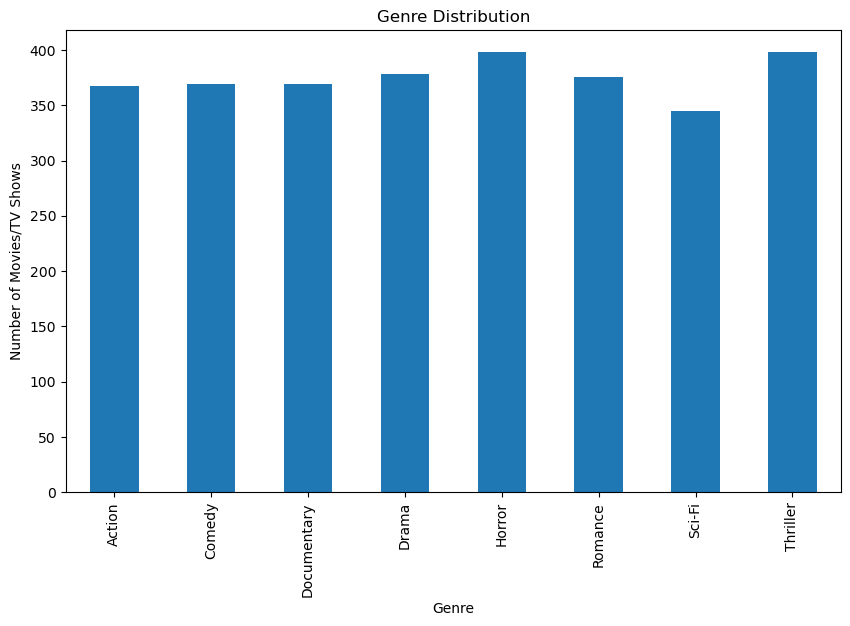

In [21]:
import matplotlib.pyplot as plt
genre_frequency = df['Genre'].value_counts().sort_index()

genre_relative_frequency = genre_frequency / genre_frequency.sum()

print("Frequency Table:")
print(genre_frequency)

print("\nRelative Frequency Table:")
print(genre_relative_frequency)

plt.figure(figsize=(10, 6))
genre_frequency.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Movies/TV Shows')
plt.show()

# Based off of the genre counts and percentages for each genre in the above frequency table, it seems that each genre is pretty evenly distributed. However, this includes all of the genres during all years on Netflix.

Frequency Table (after 2020):
Action          5
Comedy         17
Documentary    10
Drama          20
Horror          9
Romance        15
Sci-Fi         13
Thriller       18
Name: Genre, dtype: int64

Relative Frequency Table (after 2020):
Action         0.046729
Comedy         0.158879
Documentary    0.093458
Drama          0.186916
Horror         0.084112
Romance        0.140187
Sci-Fi         0.121495
Thriller       0.168224
Name: Genre, dtype: float64


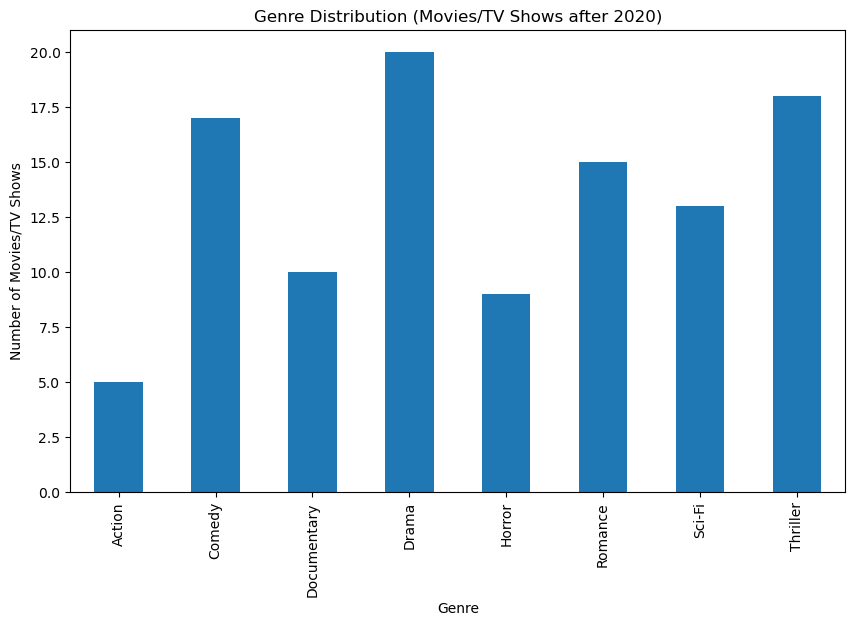

In [31]:
df_after_2020 = df[df['Release Year'] > 2020]

genre_frequency = df_after_2020['Genre'].value_counts().sort_index()

genre_relative_frequency = genre_frequency / genre_frequency.sum()

print("Frequency Table (after 2020):")
print(genre_frequency)

print("\nRelative Frequency Table (after 2020):")
print(genre_relative_frequency)

plt.figure(figsize=(10, 6))
genre_frequency.plot(kind='bar')
plt.title('Genre Distribution (Movies/TV Shows after 2020)')
plt.xlabel('Genre')
plt.ylabel('Number of Movies/TV Shows')
plt.show()

# The above frequency table displays movies/TV shows after the Release Year of 2020.

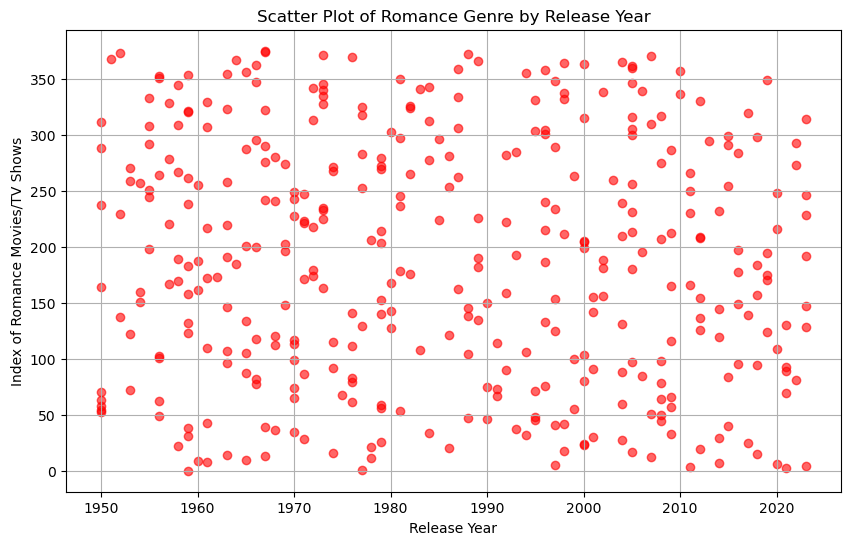

In [34]:
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame and contains 'Genre' and 'Year' columns

# Filter the DataFrame to include only Romance genre
romance_df = df[df['Genre'] == 'Romance']

# Create a scatter plot using 'Year' (Release Year) on the x-axis
# and an arbitrary value (like the index) on the y-axis
plt.figure(figsize=(10, 6))
plt.scatter(romance_df['Release Year'], range(len(romance_df)), color='red', alpha=0.6)

# Adding labels and title
plt.title('Scatter Plot of Romance Genre by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Index of Romance Movies/TV Shows')
plt.grid(True)

# Show the plot
plt.show()


# The above scatterplot, despite there being little to no correlation, the amount of romance releases has been pretty consistent over the years, showing that there is minimal chance of a change in the data to occur for the years 2020+.

In [33]:
df_after_2020 = df[df['Release Year'] > 2020]

total_shows = df_after_2020.shape[0]

romance_shows = df_after_2020[df_after_2020['Genre'] == 'Romance'].shape[0]

probability_romance = romance_shows / total_shows

print(f"{probability_romance:.4f}")

0.1402


# My Answer

### Based on the genre distribution past the year 2020 (using frequency tables/scatterplot/Simple Theoretical Probability), the probability of the next Netflix release to be of the Romance genre is 14.02%.